<a href="https://colab.research.google.com/github/Vishwa1030/CODSOFT/blob/main/Task4_ipyn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import seaborn as sns
import matplotlib.pyplot as plt

# **Loading the Dataset**

In [ ]:
car = pd.read_csv('/content/task4.csv', encoding='latin1')
print(car)

       customer name                                    customer e-mail  \
0      Martina Avila  cubilia.Curae.Phasellus@quisaccumsanconvallis.edu   
1      Harlan Barnes                                eu.dolor@diam.co.uk   
2    Naomi Rodriquez  vulputate.mauris.sagittis@ametconsectetueradip...   
3    Jade Cunningham                            malesuada@dignissim.com   
4       Cedric Leach     felis.ullamcorper.viverra@egetmollislectus.net   
..               ...                                                ...   
495           Walter                                ligula@Cumsociis.ca   
496            Vanna                 Cum.sociis.natoque@Sedmolestie.edu   
497            Pearl                      penatibus.et@massanonante.com   
498             Nell                  Quisque.varius@arcuVivamussit.net   
499            Marla                          Camaron.marla@hotmail.com   

          country  gender        age  annual Salary  credit card debt  \
0        Bulgaria       0 

In [ ]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [ ]:
car.describe()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


### **Define Features and Target Variable**

In [ ]:
X = car[['annual Salary', 'net worth', 'credit card debt', 'age']]
y = car['car purchase amount']

### **Split the Dataset into Training and Testing Sets**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Standardize the Features**

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### **Build the Neural Network Model**

In [ ]:
model = keras.Sequential([layers.Dense(128, activation='relu', input_shape=[X_train.shape[1]]),
                          layers.Dense(64, activation='relu'),layers.Dense(1)])

### **Compile the Model**

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

### **Train the Model**

In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=2)

Epoch 1/20
10/10 - 1s - loss: 2076152576.0000 - val_loss: 1938651392.0000 - 875ms/epoch - 88ms/step
Epoch 2/20
10/10 - 0s - loss: 2076071168.0000 - val_loss: 1938562688.0000 - 38ms/epoch - 4ms/step
Epoch 3/20
10/10 - 0s - loss: 2075961600.0000 - val_loss: 1938440192.0000 - 67ms/epoch - 7ms/step
Epoch 4/20
10/10 - 0s - loss: 2075808384.0000 - val_loss: 1938274304.0000 - 46ms/epoch - 5ms/step
Epoch 5/20
10/10 - 0s - loss: 2075599488.0000 - val_loss: 1938049280.0000 - 68ms/epoch - 7ms/step
Epoch 6/20
10/10 - 0s - loss: 2075316992.0000 - val_loss: 1937747200.0000 - 58ms/epoch - 6ms/step
Epoch 7/20
10/10 - 0s - loss: 2074941824.0000 - val_loss: 1937349376.0000 - 61ms/epoch - 6ms/step
Epoch 8/20
10/10 - 0s - loss: 2074453248.0000 - val_loss: 1936836224.0000 - 65ms/epoch - 7ms/step
Epoch 9/20
10/10 - 0s - loss: 2073819136.0000 - val_loss: 1936187776.0000 - 65ms/epoch - 7ms/step
Epoch 10/20
10/10 - 0s - loss: 2073030016.0000 - val_loss: 1935370240.0000 - 61ms/epoch - 6ms/step
Epoch 11/20
10/10

### **Make Predictions and Evaluate the Model**

In [ ]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)


4/4 [==============================] - 0s 2ms/step
Mean Squared Error: 2127630733.989785


### **Visualize the Training History**

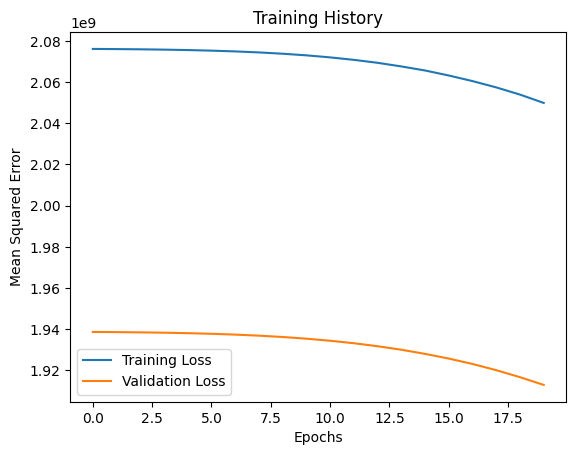

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Training History')
plt.legend()
plt.show()

### **Visualize Predicted vs Actual Values**

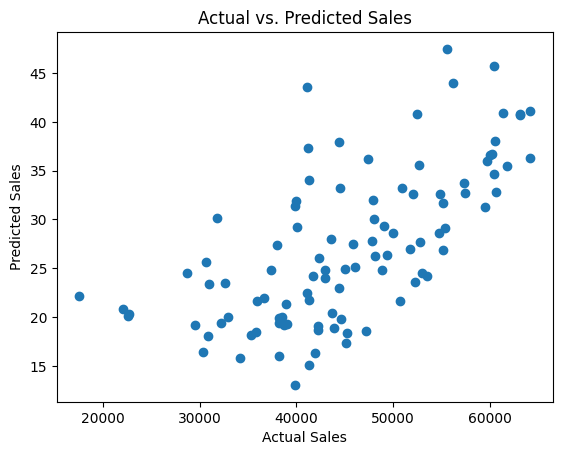

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales')
plt.show()

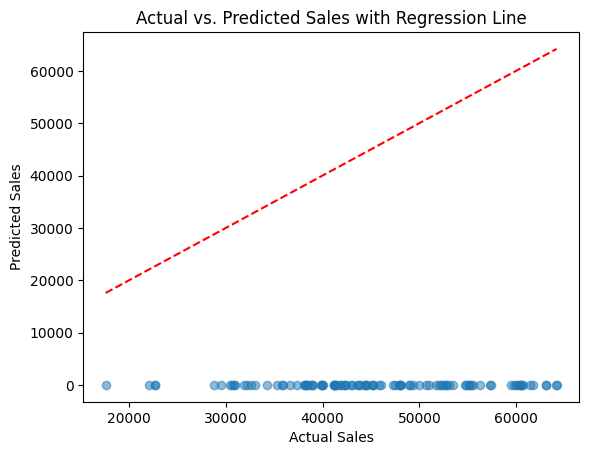

In [ ]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')  # Regression line
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales with Regression Line')
plt.show()


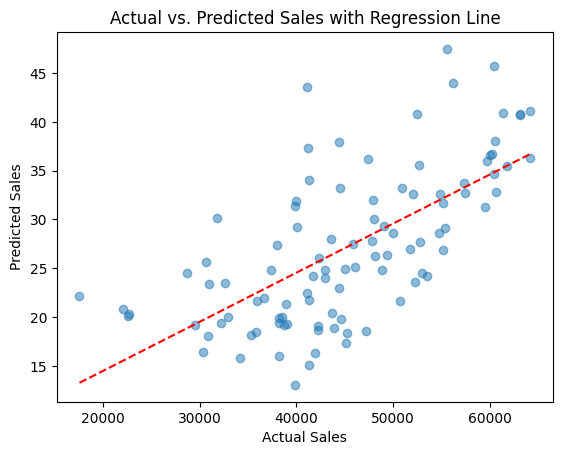

In [ ]:
plt.scatter(y_test, y_pred, alpha=0.5)
regression_line = np.polyfit(y_test, y_pred, 1)
plt.plot([min(y_test), max(y_test)], np.polyval(regression_line, [min(y_test), max(y_test)]), linestyle='--', color='red')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales with Regression Line')
plt.show()

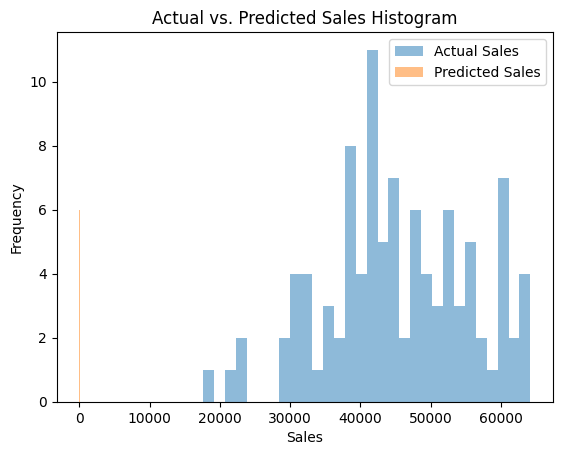

In [ ]:
plt.hist(y_test, bins=30, alpha=0.5, label='Actual Sales')
plt.hist(y_pred, bins=30, alpha=0.5, label='Predicted Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Actual vs. Predicted Sales Histogram')
plt.legend()
plt.show()

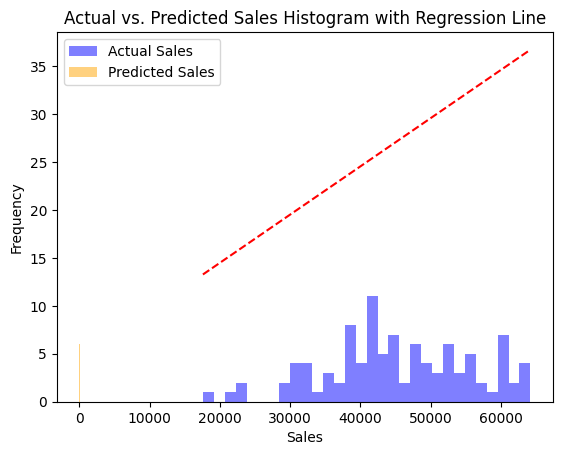

In [ ]:
plt.hist(y_test, bins=30, alpha=0.5, label='Actual Sales', color='blue')
plt.hist(y_pred, bins=30, alpha=0.5, label='Predicted Sales', color='orange')
regression_line = np.polyfit(y_test, y_pred, 1)
plt.plot([min(y_test), max(y_test)], np.polyval(regression_line, [min(y_test), max(y_test)]), linestyle='--', color='red')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Actual vs. Predicted Sales Histogram with Regression Line')
plt.legend()
plt.show()


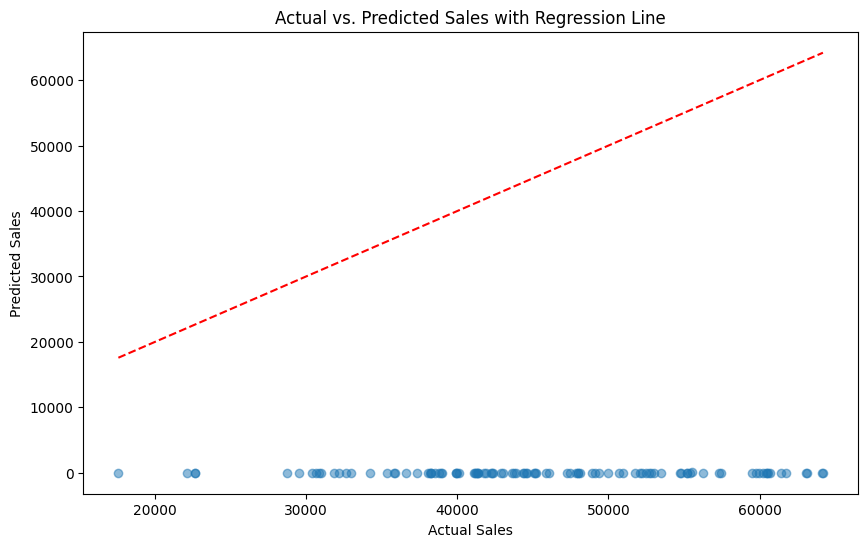

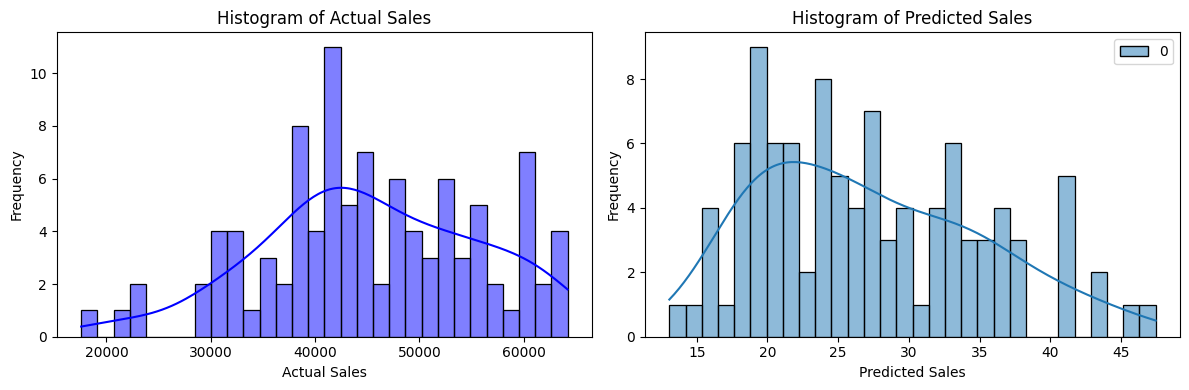

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales with Regression Line')
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(y_test, bins=30, kde=True, color='blue')
plt.xlabel('Actual Sales')
plt.ylabel('Frequency')
plt.title('Histogram of Actual Sales')
plt.subplot(1, 2, 2)
sns.histplot(y_pred, bins=30, kde=True, color='orange')
plt.xlabel('Predicted Sales')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Sales')
plt.tight_layout()
plt.show()
